# CSV

In [1]:
import csv

with open('productos.csv', 'r') as archivo:
    lector = csv.reader(archivo)
    for fila in lector:
        print(fila)


['Producto', 'Precio']
['Manzana', '0.5']
['Plátano', '0.3']


In [2]:
datos = [['Nombre', 'Edad'], ['Cecilia', 28], ['Luis', 34]]

with open('salida.csv', 'w', newline='') as archivo:
    escritor = csv.writer(archivo)
    escritor.writerows(datos)


In [44]:
print(datos[0])

['Nombre', 'Edad']


In [47]:
with open('salida.csv', 'r') as archivo:
    lector = csv.reader(archivo)
    for fila in lector:
        print(fila)

['Nombre', 'Edad']
['Cecilia', '28']
['Luis', '34']


In [52]:
with open('salida2.csv', 'w', newline='') as archivo:
    escritor = csv.writer(archivo)
    for i in datos:
        escritor.writerow(i)

In [53]:
# Lectura del archivo con encabezados y delimitador ';'
with open('punto_coma.csv', mode='r', newline='') as file:
    reader = csv.DictReader(file, delimiter=';') # El delimiter va en el DictReader para que entienda que se separan los elementos con ;
    for row in reader:
        print(f"Nombre: {row['nombre']}, Edad: {row['edad']}, Ciudad: {row['ciudad']}")

# Datos para escribir en un nuevo archivo CSV
nuevos_datos = [
    {'nombre': 'Daniel', 'edad': 35, 'ciudad': 'La Serena'},
    {'nombre': 'Eva', 'edad': 28, 'ciudad': 'Antofagasta'}
]

# Escritura de un nuevo archivo con encabezados y delimitador ';'
with open('nuevos_datos.csv', mode='w', newline='') as file:
    fieldnames = ['nombre', 'edad', 'ciudad']
    writer = csv.DictWriter(file, fieldnames=fieldnames, delimiter=';') # Acá, el delimieter implica que se vayan separando los elementos con ;
    

    # Escribir encabezado
    writer.writeheader()

    # Escribir filas
    writer.writerows(nuevos_datos)

Nombre: Ana, Edad: 23, Ciudad: Santiago
Nombre: Carlos, Edad: 30, Ciudad: Valparaíso
Nombre: Bárbara, Edad: 27, Ciudad: Concepción


In [4]:
# Recordar que es buena práctica abrir archivos con try

try:
    with open('salida.csv', 'r') as archivo:
        lector = csv.reader(archivo)
        for fila in lector:
            print(fila)
except FileNotFoundError:
    print("El archivo no existe.")
    
except PermissionError:
    print("No tiene permiso para abrir este archivo.")

['Nombre', 'Edad']
['Irina', '28']
['Luis', '34']


In [55]:
# Escritura con excepciones

datos = [['Producto', 'Precio'], ['Manzana', 0.5], ['Plátano', 0.3]]

try:
    with open('productos.csv', 'w', newline='') as archivo: # qué pasa si cambiamos w a 'a'
        escritor = csv.writer(archivo)
        escritor.writerows(datos)
except Exception as e:
    print(f"Ocurrió un error: {e}")

# OS

In [1]:
import os
os.rename('filename.txt', 'new_filename.txt')

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'filename.txt' -> 'new_filename.txt'

In [2]:
dir = '/path/to/dir'

os.path.join(dir, 'filename.txt') #por qué pasó eso?


'/path/to/dir\\filename.txt'

In [3]:
os.getcwd()

'c:\\Users\\leikc\\Desktop\\FS Python 075\\M4\\manip. de archivos'

In [57]:
dir = '\\path\\to\\dir'

os.path.join(os.getcwd(), 'filename.txt')

'c:\\Users\\leikc\\Desktop\\Clases Edutecno\\Módulo 4\\sesion 9\\filename.txt'

In [58]:
import os

# Obtener la lista de archivos y directorios en el directorio actual
contenido = os.listdir()

print("Contenido del directorio actual:")
# Mostrar cada elemento en una nueva línea
for elemento in contenido:
    print(elemento)


Contenido del directorio actual:
csv.ipynb
CSV.pptx
desktop.ini
nuevos_datos.csv
productos.csv
punto_coma.csv
salida.csv
salida2.csv
ventas.csv
ventas_totales_por_producto.csv
~$CSV.pptx


In [59]:
print(os.listdir()) #entrega el resultado como lista

['csv.ipynb', 'CSV.pptx', 'desktop.ini', 'nuevos_datos.csv', 'productos.csv', 'punto_coma.csv', 'salida.csv', 'salida2.csv', 'ventas.csv', 'ventas_totales_por_producto.csv', '~$CSV.pptx']


In [4]:
import os

# Nombre del directorio a crear
nombre_directorio = 'prueba_os'

# Crear el directorio
os.mkdir(nombre_directorio)
print(f"Directorio '{nombre_directorio}' creado.")

# Verificar si el directorio existe
if os.path.exists(nombre_directorio):
    print(f"El directorio '{nombre_directorio}' existe.")

# Eliminar el directorio
os.rmdir(nombre_directorio)
print(f"Directorio '{nombre_directorio}' eliminado.")

# Verificar si el directorio aún existe
if not os.path.exists(nombre_directorio):
    print(f"El directorio '{nombre_directorio}' ya no existe.")


Directorio 'prueba_os' creado.
El directorio 'prueba_os' existe.
Directorio 'prueba_os' eliminado.
El directorio 'prueba_os' ya no existe.


# Pandas 

In [5]:
import pandas as pd

df = pd.read_csv('ventas.csv', sep=",")

In [6]:
df

,Producto,Ventas
0,A,100.0
1,B,200.0
2,A,150.0
3,C,300.0
4,B,NaN
5,C,250.0
6,A,80.0
7,B,114.0
8,C,25.0
9,C,17.0


In [ ]:
df.head(2)

,Producto,Ventas
0,A,100.0
1,B,200.0


In [10]:
df.tail(3)

,Producto,Ventas
10,B,33.0
11,B,34.0
12,A,45.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Producto  13 non-null     object 
 1   Ventas    12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 340.0+ bytes


In [16]:
df["Ventas"].isnull().sum()  # Verifica si hay valores nulos en la columna "Ventas"
#reemplazar los valores nulos con 0
df["Ventas"].fillna(0, inplace=True)  # Reemplaza los valores nulos con 0 en la columna "Ventas"

In [17]:
df["Ventas"].isnull().sum()

0

In [82]:
df.columns

Index(['Producto', 'Ventas'], dtype='object')

In [ ]:
#df.to_csv('nuevos.csv', index=False)

In [18]:
# crear un dataframe a partir de un diccionario
datos = {
    'Nombre': ['José', 'Luis', 'Vale', 'Juan'],
    'Edad': [28, 34, 29, 42],
    'Ciudad': ['Santiago', 'Temuco', 'Valdivia', 'Pto. Montt']
}

df = pd.DataFrame(datos)

# Mostrar el DataFrame completo
print("DataFrame")
print(df)




DataFrame
  Nombre  Edad      Ciudad
0   José    28    Santiago
1   Luis    34      Temuco
2   Vale    29    Valdivia
3   Juan    42  Pto. Montt


In [19]:
# Seleccionar la columna 'Nombre'
print("\nColumna 'Nombre':")
print(df['Nombre'])




Columna 'Nombre':
0    José
1    Luis
2    Vale
3    Juan
Name: Nombre, dtype: object


In [20]:
# Filtrar filas donde la edad es mayor de 30
filtro= df['Edad'] > 30

mayores_de_30 = df[filtro]

print("\nPersonas con edad mayor a 30:")
print(mayores_de_30)


Personas con edad mayor a 30:
  Nombre  Edad      Ciudad
1   Luis    34      Temuco
3   Juan    42  Pto. Montt


In [21]:
# Leer datos desde un archivo CSV
df = pd.read_csv('ventas.csv')

# Ver las primeras 5 filas del DataFrame
print("Primeras 5 filas del DataFrame:")
print(df.head())




Primeras 5 filas del DataFrame:
  Producto  Ventas
0        A   100.0
1        B   200.0
2        A   150.0
3        C   300.0
4        B     NaN


In [22]:
# Eliminar filas con datos faltantes
df_limpio = df.dropna()

# Calcular la venta total por producto (si les interesa pueden investigar de GroupBy)
ventas_por_producto = df_limpio.groupby('Producto')['Ventas'].sum()



In [23]:
# Mostrar las ventas totales por producto
print("\nVentas totales por producto:")
print(ventas_por_producto)




Ventas totales por producto:
Producto
A    375.0
B    381.0
C    592.0
Name: Ventas, dtype: float64


In [79]:
# Exportar el resultado a un nuevo archivo CSV
ventas_por_producto.to_csv('ventas_totales_por_producto.csv')

<AxesSubplot: xlabel='Producto'>

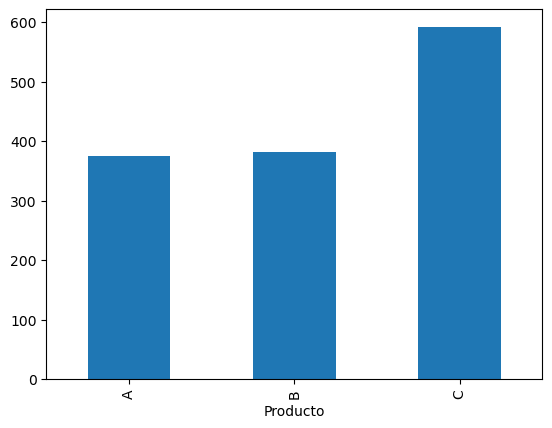

In [6]:
#imprimir un grafico de barras para ventas por producto
ventas_por_producto.plot(kind='bar')

In [80]:
ventas_por_producto.describe()

count      3.000000
mean     449.333333
std      123.589374
min      375.000000
25%      378.000000
50%      381.000000
75%      486.500000
max      592.000000
Name: Ventas, dtype: float64

In [70]:
ventas_por_producto.value_counts()

375.0    1
381.0    1
592.0    1
Name: Ventas, dtype: int64

# Ejercicio:

Revisa los comandos anteriores pero con el archivo 'ventas.csv'

investiga otros comandos interesantes  en la documentacion de pandas

¿como podriamos crear un grafico de torta?